# Importing Lib

In [228]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

# Importing & Inspecting

In [230]:
data = pd.read_csv('kaggle_survey_2020_responses.csv',header=None)
data.shape

C:\Users\STRANGER\AppData\Local\Temp\ipykernel_5988\509408960.py:1: DtypeWarning: Columns (0,18,31,45,50,63,80,92,99,105,130,171,187,241,254,266,278,289,307,322,330,342,353) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('kaggle_survey_2020_responses.csv',header=None)


(20038, 355)

In [231]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
count,20038,20038,20038,20038,19571,19279,19122,15532,4279,7537,...,1179,496,432,3201,559,482,848,521,2,253
unique,5169,13,7,57,9,15,9,3,3,3,...,3,3,3,3,3,3,3,3,2,3
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,Q35_B_Part_10,Other
freq,34,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,1,251


                                            Getting Questions in sheet to Summarize it 

                                                    wrong method but to understand 

In [235]:
first_row = data.iloc[0]  # الصف الثاني في الجدول
second_row=data.iloc[1]
first_10_words = first_row.apply(lambda x:str(x).split('_')[0]) 
#عشان تخلي الشغل علي الصف كلو واحد lambda  
#cellترمز ل  x
#join العلامه دي (' ') عشان تقولو عند كل مسافه هتعمل الاتي اول حاجه من جوا خالص هتفصل ثم تاخد اول اربعه بعد الفصل اللي هي الكلمات اللي هي في اكس ثم تعملهم 
grouped=first_10_words.drop_duplicates()
# print(grouped)

                                                    The right way to get the questions 

In [237]:
# استخراج الصفوف الأولى والثانية
first_row = data.iloc[0]
second_row = data.iloc[1]

# معالجة البيانات في الصف الأول
first = first_row.apply(lambda x: str(x).split('_')[0])  # تقسيم على العلامة '_'

# معالجة البيانات في الصف الثاني
second = second_row.apply(lambda x: str(x).split('?')[0])  # تقسيم على العلامة '?'
second = second.apply(lambda x: str(x).split(':')[0])     # تقسيم على العلامة ':'

# دمج البيانات في DataFrame بحيث يظهر كل عنصر مقابل الآخر
processed_data = pd.DataFrame({
    'First Row Processed': first.values,  # تحويل إلى قائمة قيم
    'Second Row Processed': second.values
})

# إزالة التكرارات بناءً على الصف الأول
processed_data = processed_data.drop_duplicates(subset='First Row Processed')

# إعادة تعيين الفهرس لإزالة الأرقام الموجودة على الجانب
processed_data = processed_data.reset_index(drop=True)


# عرض النتيجة النهائية
print(processed_data)
# processed_data.to_csv('Questions.csv')


                    First Row Processed  \
0   Time from Start to Finish (seconds)   
1                                    Q1   
2                                    Q2   
3                                    Q3   
4                                    Q4   
5                                    Q5   
6                                    Q6   
7                                    Q7   
8                                    Q8   
9                                    Q9   
10                                  Q10   
11                                  Q11   
12                                  Q12   
13                                  Q13   
14                                  Q14   
15                                  Q15   
16                                  Q16   
17                                  Q17   
18                                  Q18   
19                                  Q19   
20                                  Q20   
21                                  Q21   
22         

                                                To be More Summarize 
                                            

In [239]:
 first_row = data.iloc[0]
 second_row = data.iloc[1]


 # معالجة البيانات في الصف الأول
 first = first_row.apply(lambda x: str(x).split('_')[0])  # تقسيم على العلامة '_'

 # معالجة البيانات في الصف الثاني
 second = second_row.apply(lambda x: str(x).split('?')[0])  # تقسيم على العلامة '?'
 third = second.apply(lambda x: str(x).split(':')[0])      # تقسيم على العلامة ':'

# # دمج المعالجة السابقة في DataFrame جديد
processed_data = pd.DataFrame({
    'First Row Processed': first.values,
    'Second Row Processed': third.values
}).drop_duplicates(subset='First Row Processed').reset_index(drop=True)
# عرض النتيجة النهائية
# print(processed_data)


                                                After Reviewing The General Questions

In [241]:
# Notes 
# Using of AI according to gender and age 
# Using of AI according to education and country 
# using of AI according to payment and position 

                                                Making excel file to make the charts on power bi 

In [267]:
data.iloc[:,65].unique()

array(['Q15',
       'For how many years have you used machine learning methods?',
       '1-2 years', 'I do not use machine learning methods', '3-4 years',
       nan, 'Under 1 year', '2-3 years', '4-5 years', '5-10 years',
       '20 or more years', '10-20 years'], dtype=object)

In [244]:
data.iloc[:,4].unique()

array(['Q4',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Doctoral degree', 'Master’s degree', 'Bachelor’s degree',
       'No formal education past high school',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree', 'I prefer not to answer', nan], dtype=object)

In [292]:
age_column=data.iloc[:,1]
# gender_column=data[data.iloc[:,2].isin(['Man','Woman'])].iloc[:,2]#.ilco عشان تفلتر العمود 
gender_column = data.iloc[:, 2].where(data.iloc[:, 2].isin(['Man', 'Woman'])) #الطريقه دي افضل عشان متشلش البيانات زي اللي فوق عشان متلغبطش البيانات
country_column=data.iloc[:,3]
education_column=data.iloc[:,4]
ai_users_value = data.iloc[:, 65].apply(lambda x: 1 if x in ['1-2 years', '3-4 years', 'Under 1 year', '2-3 years', '4-5 years', 
                 '5-10 years', '20 or more years', '10-20 years'] else 0)
ai_users_experinces=data.iloc[:,65].fillna(0)

data2=pd.DataFrame({
    "Age":age_column,
    "Gender":gender_column,
    "Country":country_column,
    "education":education_column,
    "AI User (Yes=1, No=0)":ai_users_value,
    "AI Experience":ai_users_experinces
})
data2=data2.iloc[2:].reset_index(drop=True)
# data2.to_excel("AI_Users_Data.xlsx",index=False)

In [393]:
data2=pd.read_excel('AI_Users_Data.xlsx')
data_trimmed=data.iloc[2:].reset_index(drop=True)
salary_column=data_trimmed.iloc[:,118].fillna(0)
data2['Salary'] =salary
position_column=data_trimmed.iloc[:,5]
data2["Position"] =position
# data2
# data2.to_excel('AI_Users_Data2.xlsx', index=False)

                                                 Using of AI according to gender and age 

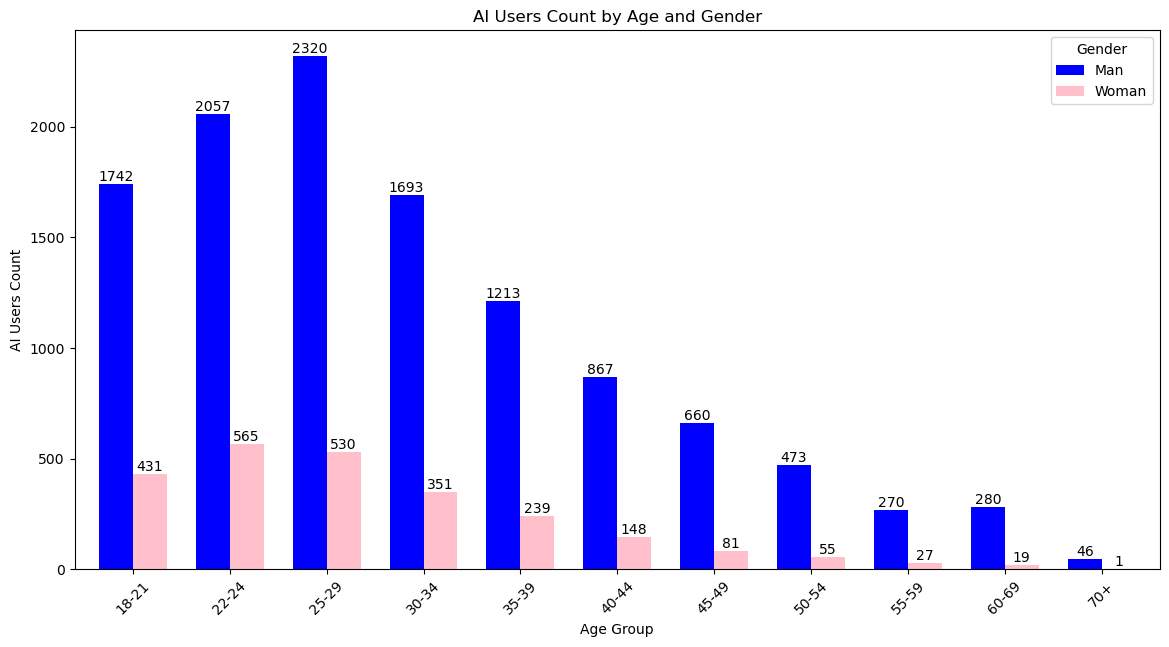

In [297]:

# تجميع البيانات حسب العمر والجنس
grouped_data = data2.groupby(['Age','Gender'])['AI User (Yes=1, No=0)'].sum().unstack()


custom_cmap = mcolors.ListedColormap(["blue", "pink"])
ax = grouped_data.plot(kind="bar", figsize=(14, 7), width=0.7,colormap=custom_cmap)

# إضافة القيم فوق كل عمود
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')


# تخصيص العناوين والمحاور
plt.xlabel("Age Group")
plt.ylabel("AI Users Count")
plt.title("AI Users Count by Age and Gender")
plt.xticks(x, grouped_data.index, rotation=45)  # ضبط أسماء الفئات العمرية
plt.legend(title="Gender")


                                                  Using of AI according to education and country           

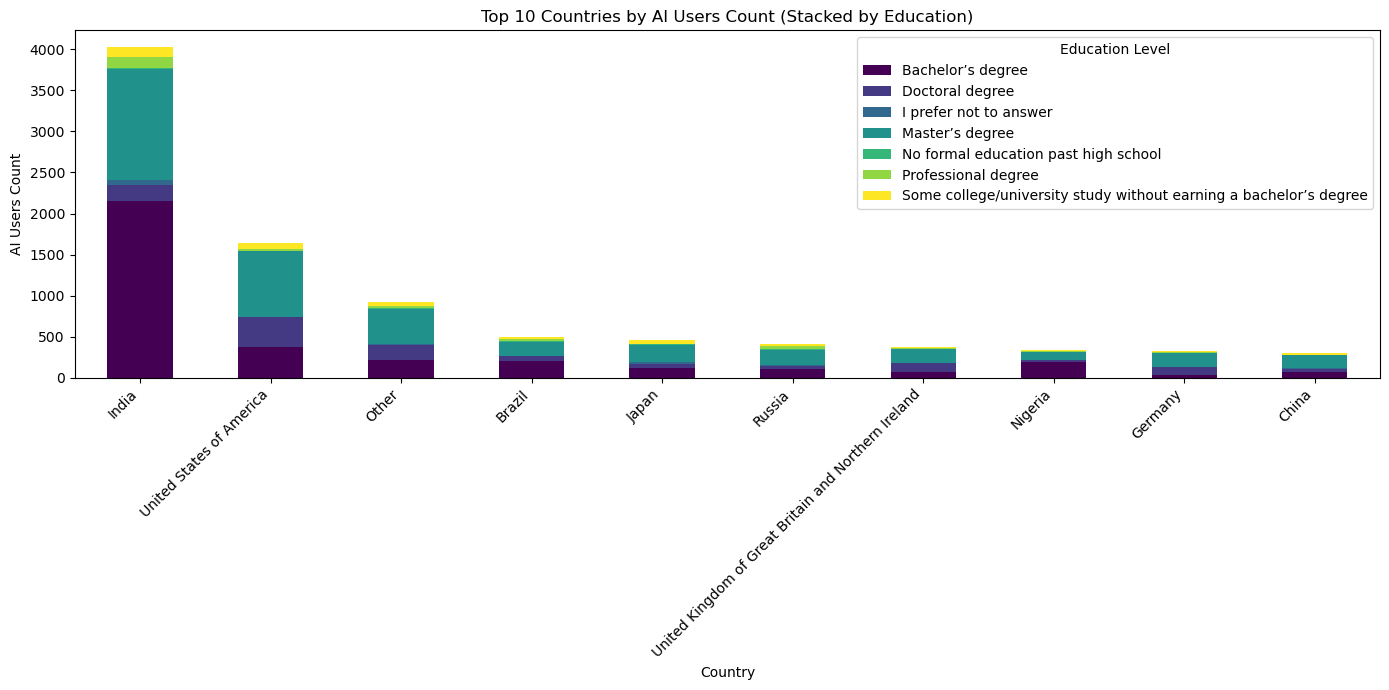

In [250]:
# تجميع البيانات حسب الدولة والتعليم
grouped_data2 = data2.groupby(["Country", "education"])["AI User (Yes=1, No=0)"].sum().unstack()

# تصفية أعلى 10 دول حسب عدد مستخدمي الذكاء الاصطناعي
top_countries = grouped_data2.sum(axis=1).nlargest(10).index
filtered_data = grouped_data2.loc[top_countries]

# رسم الـ Stacked Bar Chart

filtered_data.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="viridis")

# تخصيص المخطط
plt.xlabel("Country")
plt.ylabel("AI Users Count")
plt.title("Top 10 Countries by AI Users Count (Stacked by Education)")
plt.xticks(rotation=45, ha='right')  # تدوير أسماء الدول لتحسين الوضوح
plt.legend(title="Education Level")
plt.tight_layout()

# عرض الرسم
plt.show()


                                                    using of AI according to payment and position 

In [303]:
data.iloc[:,118].unique()

array(['Q24',
       'What is your current yearly compensation (approximate $USD)?',
       nan, '100,000-124,999', '15,000-19,999', '125,000-149,999',
       '70,000-79,999', '30,000-39,999', '90,000-99,999', '1,000-1,999',
       '$0-999', '10,000-14,999', '150,000-199,999', '60,000-69,999',
       '4,000-4,999', '> $500,000', '300,000-500,000', '40,000-49,999',
       '25,000-29,999', '80,000-89,999', '7,500-9,999', '50,000-59,999',
       '250,000-299,999', '5,000-7,499', '2,000-2,999', '20,000-24,999',
       '200,000-249,999', '3,000-3,999'], dtype=object)

In [367]:
def filter_salary(salary):
    # salary = salary.fillna(0)#بتستحدم و انت بتقرا ملف فقط و مش زظيفه ثابته fillna خطاء عشان 
    if pd.isna(salary):
        return 0
    salary =str(salary)
    salary =salary.replace('$','').replace(',','') # ده تمام عشان ازالة اي رموز او حاجه 
    if salary.startswith('<') or salary.startswith('>'):
        return int(salary[1:].strip()) #ده برضو صح عشان لو علامة اكبر او اصغر موجوده ياخد الرقم اللي بعدو 
    # if salary == int: القاعده دي غلط عشان مفيش حاجه اسمها اسم تساوي رقم 
    #      return int
    # isinstance (salary,int): ممكن تكتب كده بس الافضل تكتب كده 
    #     return int 
    if salary.isdigit():
        return int(salary)
    # return int(salary.split('-')[0]) دي صح بس انت داخل في الموضوع علي طول مش لازم توفر الحاله 
    if '-' in salary:
        return int(salary.split('-')[0])
md_salary=salary_column.apply(filter_salary)
print(md_salary)

0             0
1        100000
2         15000
3        125000
4             0
          ...  
20031         0
20032         0
20033         0
20034         0
20035         0
Name: 118, Length: 20036, dtype: int64


In [489]:
# def round_down_to_nearest_five(number): الطريقه دي مش هتسخدمها بس عجبتني قولت احطها 
#     return (number // 5) * 5 number // 5: تقوم بقسمة العدد على 5 وتأخذ الجزء الصحيح فقط (تقريب للأسفل).
def round_to_nearest(number):
    return round(number/20000)*20000
salary_range=md_salary.apply(round_to_nearest)
data2['Salary nm']=salary_range
print (salary_range)

0             0
1        100000
2         20000
3        120000
4             0
          ...  
20031         0
20032         0
20033         0
20034         0
20035         0
Name: 118, Length: 20036, dtype: int64


In [409]:
data2['Position'].unique()

array(['Student', 'Data Engineer', 'Software Engineer', 'Data Scientist',
       'Data Analyst', 'Research Scientist', 'Other',
       'Currently not employed', 'Statistician',
       'Product/Project Manager', 'Machine Learning Engineer', nan,
       'Business Analyst', 'DBA/Database Engineer'], dtype=object)

In [455]:
bins2 = [list(range(0, 350000, 20000))]
print(bins2)

[[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000]]


In [491]:
bins = list(range(0, 350000, 20000))# تعريف فئات الرواتب
labels =  [
    '0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', 
    '100K-120K', '120K-140K', '140K-160K', '160K-180K', 
    '180K-200K', '200K-220K', '220K-240K', '240K-260K', 
    '260K-280K', '280K-300K', '300K-320K', '320K-340K'
]
data2['Salary Range'] = pd.cut(data2['Salary nm'], bins=bins, labels=labels, right=True)# إنشاء عمود جديد لتصنيف الرواتب
grouped_data3 = data2.groupby(["Salary Range", "Position"])["AI User (Yes=1, No=0)"].sum().unstack()
print(grouped_data3)

Position      Business Analyst  Currently not employed  DBA/Database Engineer  \
Salary Range                                                                    
0-20K                       58                       0                     11   
20K-40K                     91                       0                     18   
40K-60K                     20                       0                      4   
60K-80K                     44                       0                      3   
80K-100K                    31                       0                      5   
100K-120K                    6                       0                      3   
120K-140K                    0                       0                      0   
140K-160K                    8                       0                      1   
160K-180K                    0                       0                      0   
180K-200K                    6                       0                      0   
200K-220K                   

C:\Users\STRANGER\AppData\Local\Temp\ipykernel_5988\1334970853.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data3 = data2.groupby(["Salary Range", "Position"])["AI User (Yes=1, No=0)"].sum().unstack()


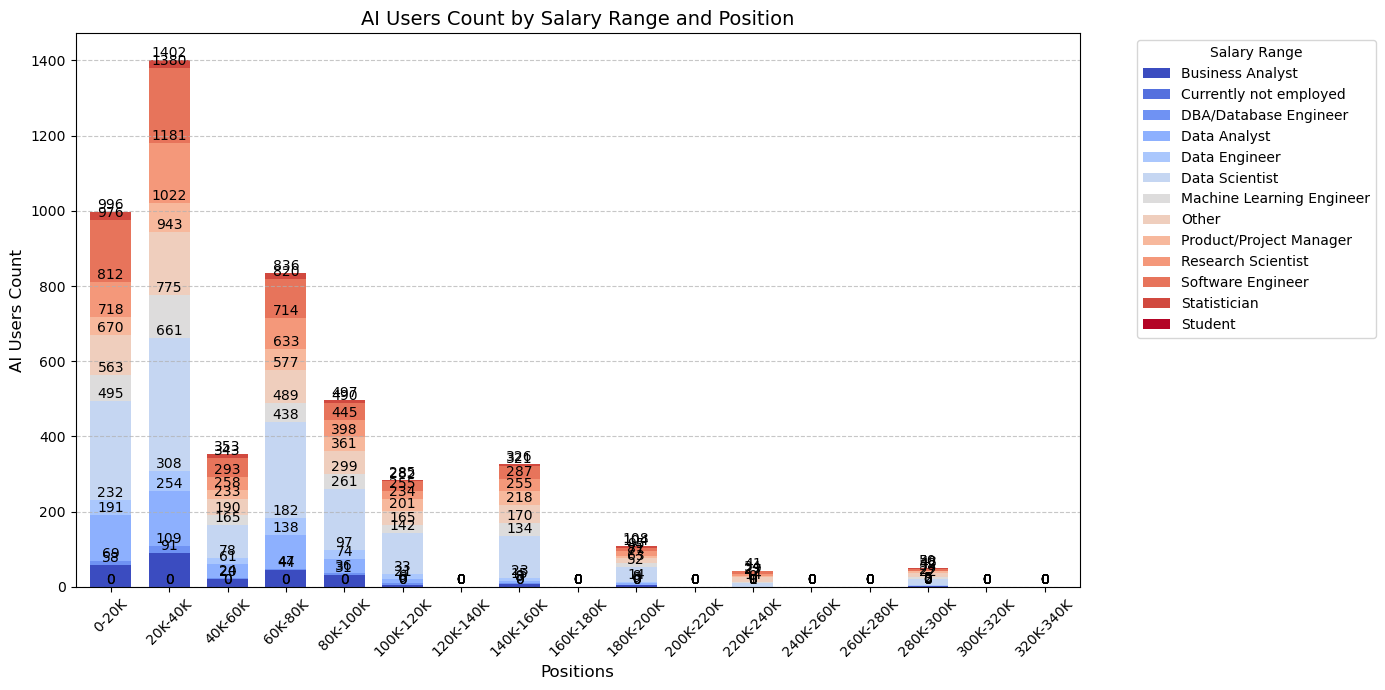

In [499]:
import matplotlib.pyplot as plt

# رسم البيانات
bx = grouped_data3.plot(kind="bar", stacked=True, figsize=(14, 7), width=0.7, colormap="coolwarm")

# إضافة القيم فوق كل عمود
for container in bx.containers:
    bx.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

# تخصيص العناوين والمحاور
plt.xlabel("Positions", fontsize=12)
plt.ylabel("AI Users Count", fontsize=12)
plt.title("AI Users Count by Salary Range and Position", fontsize=14)
plt.xticks(bx.get_xticks(), grouped_data3.index, rotation=45)  # ضبط أسماء الفئات
plt.legend(title="Salary Range", bbox_to_anchor=(1.05, 1), loc='upper left')  # تحسين موقع الوسيلة
plt.grid(axis='y', linestyle='--', alpha=0.7)  # إضافة شبكة
plt.tight_layout()  # تجنب التداخل

# عرض الرسم البياني
plt.show()